In [1]:
import pandas as pd
import numpy as np

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/train_data_final.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=192)

In [4]:
df.shape

(276572, 192)

##### Analisis sobre el target

In [29]:
df.target.value_counts(normalize = True)

0    0.751077
1    0.248923
Name: target, dtype: float64

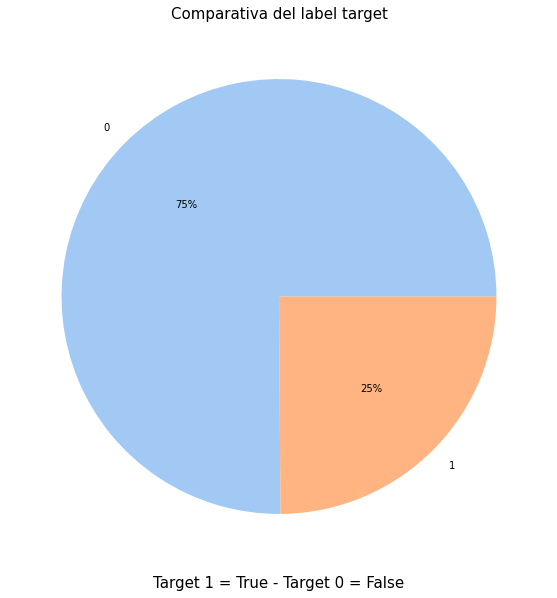

In [50]:
data = df.target.value_counts(normalize = True).values
labels = df.target.value_counts(normalize = True).index

colors = sns.color_palette('pastel')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.title('Comparativa del label target', fontsize=15)
plt.xlabel('Target 1 = True - Target 0 = False', fontsize=15)
plt.show()

Se puede observar que un 75% de los targets son negativos, probablemente haya que aplicar algun tipo de balanceo a la hora de tomar este label para predecir.

#### Analisis sobre el tipo de variables dentro del set de datos

In [5]:
d_feats = [c for c in df.columns if c.startswith('D_')]
s_feats = [c for c in df.columns if c.startswith('S_')]
p_feats = [c for c in df.columns if c.startswith('P_')]
b_feats = [c for c in df.columns if c.startswith('B_')]
r_feats = [c for c in df.columns if c.startswith('R_')]
print(f'Number of Delinquency variables: {len(d_feats)}')
print(f'Number of Spend variables: {len(s_feats)}')
print(f'Number of Payment variables: {len(p_feats)}')
print(f'Number of Balance variables: {len(b_feats)}')
print(f'Number of Risk variables: {len(r_feats)}')
print(f'Total variable counts: {len(d_feats)+ len(s_feats)+ len(p_feats) + len(b_feats) + len(r_feats)}')

Number of Delinquency variables: 96
Number of Spend variables: 22
Number of Payment variables: 3
Number of Balance variables: 40
Number of Risk variables: 28
Total variable counts: 189


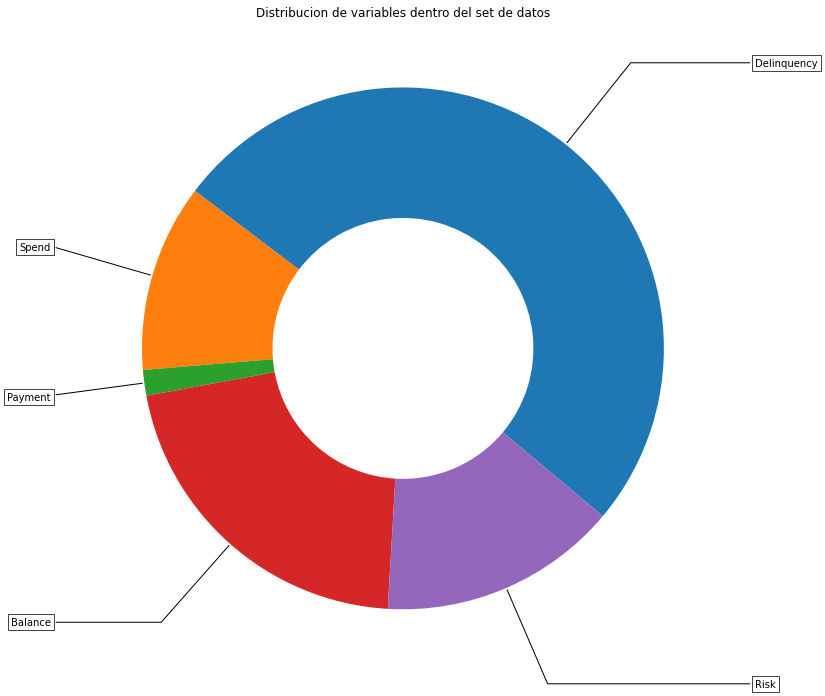

In [13]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))

variables_typle = ["Delinquency",
          "Spend",
          "Payment",
          "Balance",
          "Risk"]

variables_size = [len(d_feats), len(s_feats), len(p_feats), len(b_feats), len(r_feats)]

wedges, texts = ax.pie(variables_size, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(variables_typle[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Distribucion de variables dentro del set de datos")

plt.show()

Este plot nos marca la pauta de que las variables de delicuencia tienen mucha ingerencia en el set de datos a nivel columna ya que es la que predomina entre todos los tipos de variables, por contraparte, las de payment son el tipo de menor cantidad de features dentro del set de datos (solo 3)

#### Analisis sobre las variables categoricas

In [53]:
df.D_64.value_counts()

O     145706
U      76180
R      41794
-1      1843
Name: D_64, dtype: int64

In [54]:
df.D_63.value_counts()

CO    205794
CR     46609
CL     22019
XZ      1328
XM       530
XL       292
Name: D_63, dtype: int64

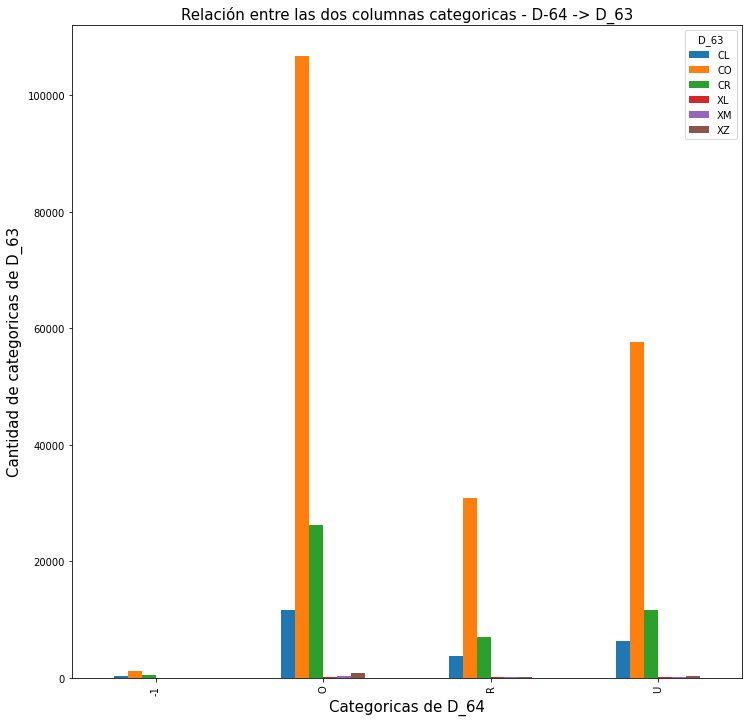

In [58]:
df.groupby(['D_64', 'D_63']).size().unstack().plot(kind= 'bar', figsize = (12,12))

 
plt.xlabel('Categoricas de D_64', fontsize=15)
plt.ylabel('Cantidad de categoricas de D_63', fontsize=15)
plt.title('Relación entre las dos columnas categoricas - D-64 -> D_63', fontsize=15)
plt.show()

Se toma a D_64 como columna de agrupacion más grande, pero es simplemente porque tienen menos categorías que D_63, como se puede observar, CO en D_63 es totalmente dominante en todas las categorias.

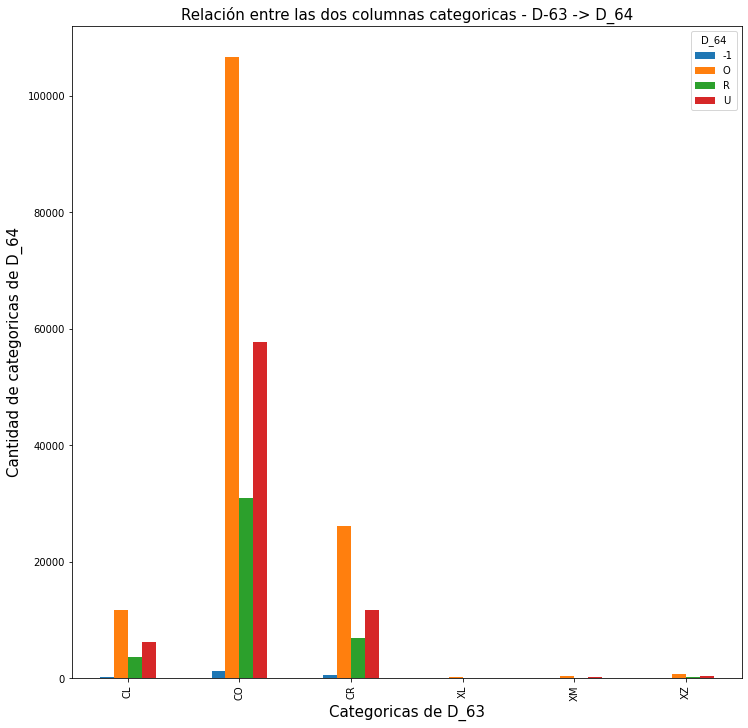

In [60]:
df.groupby(['D_64', 'D_63']).size().unstack(0).plot(kind= 'bar', figsize = (12,12))

 
plt.xlabel('Categoricas de D_63', fontsize=15)
plt.ylabel('Cantidad de categoricas de D_64', fontsize=15)
plt.title('Relación entre las dos columnas categoricas - D-63 -> D_64', fontsize=15)
plt.show()

En este caso, invertimos el orden de agrupamiento y podemos observar que dentro de CO (que es la que tiene más importancia en cantidad), el tipo de variable O se lleva las de ganar en muchas de las categorías de D_63

#### Analisis sobre usuarios repetidos

In [71]:
df.customer_ID.value_counts().sum()

276572

In [67]:
aux_df = df.customer_ID.value_counts().reset_index(name = 'customer_id_repeat_size').rename(columns = {'index':'customer_ID'})

aux_df['repeat_customer_id'] = np.where(aux_df['customer_id_repeat_size'] > 1, 1, 0)


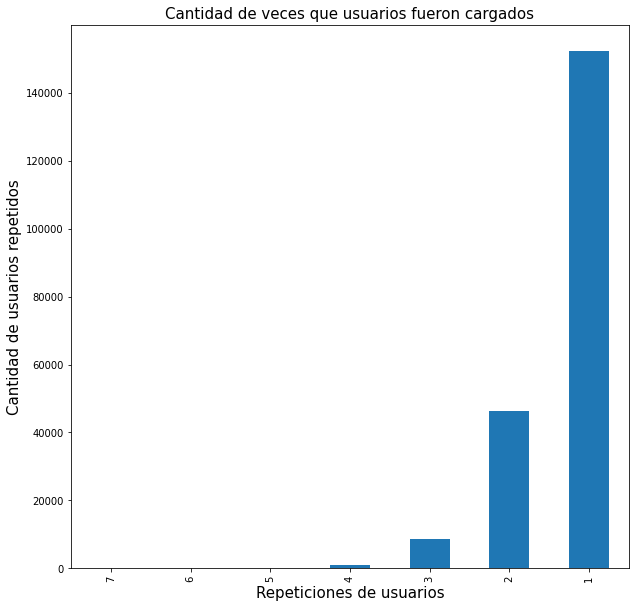

In [97]:
aux_df.customer_id_repeat_size.value_counts(normalize = False, ascending = True).plot(kind = 'bar')

plt.xlabel('Repeticiones de usuarios', fontsize=15)
plt.ylabel('Cantidad de usuarios repetidos', fontsize=15)
plt.title('Cantidad de veces que usuarios fueron cargados', fontsize=15)
plt.show()

Podemos notar que muchos usuarios fueron cargados una sola vez en el set de datos, con lo cual, es su unico ingreso dentro de los datos.

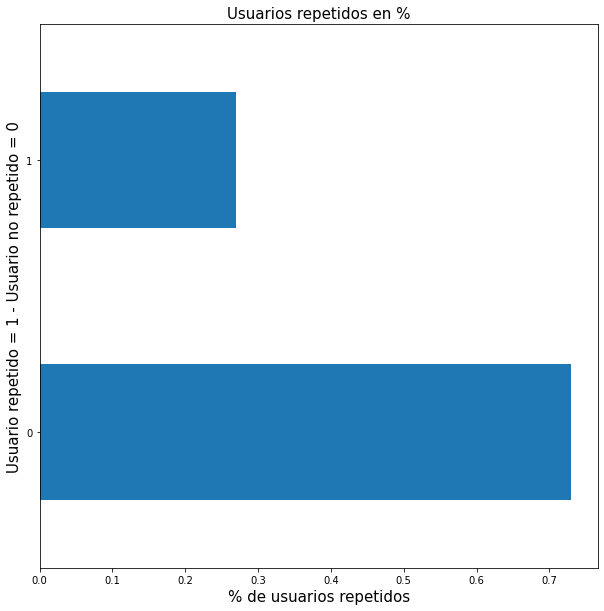

In [99]:
aux_df.repeat_customer_id.value_counts(normalize = True).plot(kind = 'barh')
plt.xlabel("% de usuarios repetidos", fontsize=15)
plt.ylabel('Usuario repetido = 1 - Usuario no repetido = 0', fontsize=15)
plt.title('Usuarios repetidos en %', fontsize=15)
plt.show()

Acá podemos destacar que más del 20% de los customer_id estan cargandos más de una vez dentro de nuestros datos, posible feature en este caso.

#### Analisis sobre las fechas de cargas

In [133]:
fechas = pd.to_datetime(df.S_2)
fechas_aux = pd.DataFrame()
fechas_aux['año'] = fechas.dt.year
fechas_aux['mes'] = fechas.dt.month


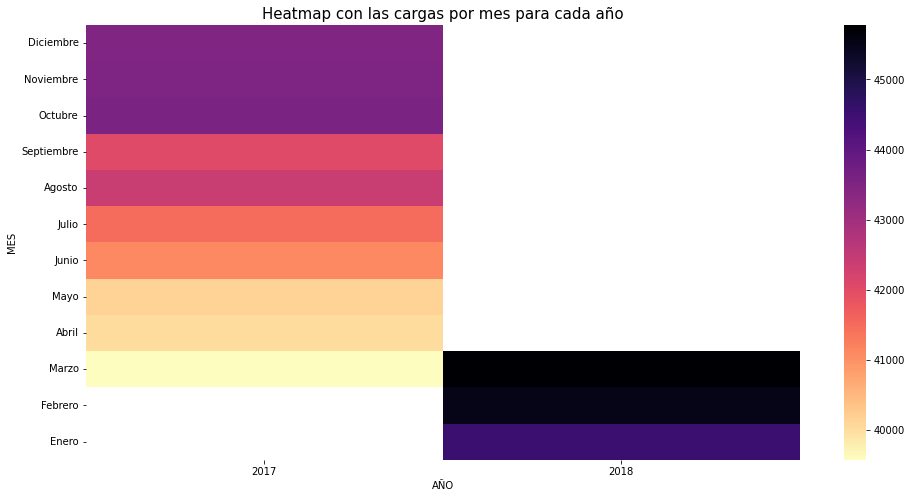

In [110]:
aux = fechas_aux.groupby(['año', 'mes']).agg(np.size).reset_index()
pivoted = pd.pivot_table(aux, values=0, columns='año', index='mes')
fig, ax = plt.subplots(figsize=(16,8))
g = sns.heatmap(pivoted,cmap='magma_r')
g.set_xlabel('AÑO')
g.set_ylabel('MES')
g.set_title("Heatmap con las cargas por mes para cada año",fontsize=15)
g.invert_yaxis()
g.set_yticklabels(labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=0)
g

plt.show()

El set de datos marca una tendencia en el mez de Marzo y Febrero del 2018 donde hubo una sobre carga de datos cargados sobre esa fecha. Hay una especie de incrementalidad desde enero del 2017 hasta marzo del 2018 en cuanto a la cantidad de registros.

#### Analisis sobre las fechas de cargas donde fueron canceladas (target = 1)

In [143]:
fechas = pd.to_datetime(df.S_2)
df_aux = pd.DataFrame()
df_aux['año'] = fechas.dt.year
df_aux['mes'] = fechas.dt.month
df_aux['target'] = df.target



In [149]:
df_aux_label_1 = df_aux.loc[df['target'] == 1]

,año,mes,target
2,2017,7,1
3,2017,3,1
5,2017,6,1
6,2017,7,1
7,2017,7,1
...,...,...,...
276563,2017,7,1
276565,2018,1,1
276567,2017,3,1
276570,2017,4,1


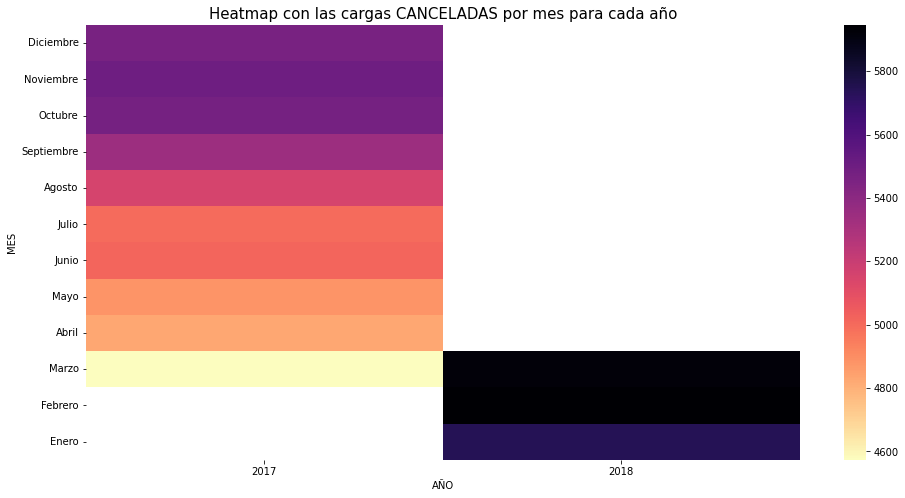

In [151]:
aux = df_aux_label_1.groupby(['año', 'mes']).agg(np.size).reset_index()
pivoted = pd.pivot_table(aux, values='target', columns='año', index='mes')
fig, ax = plt.subplots(figsize=(16,8))
g = sns.heatmap(pivoted,cmap='magma_r')
g.set_xlabel('AÑO')
g.set_ylabel('MES')
g.set_title("Heatmap con las cargas CANCELADAS por mes para cada año",fontsize=15)
g.invert_yaxis()
g.set_yticklabels(labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=0)
g

plt.show()

El plot nos muestra que no hay ningun tipo de estacionalidad marcada en algun mes o año particular, matiene la misma proporción que los datos sin filtrar por el label igual a 1.

In [158]:
fechas = pd.to_datetime(df.S_2)
fechas_aux = pd.DataFrame()
fechas_aux['año'] = fechas.dt.year
fechas_aux['mes'] = fechas.dt.month
fechas_aux['target'] = df.target

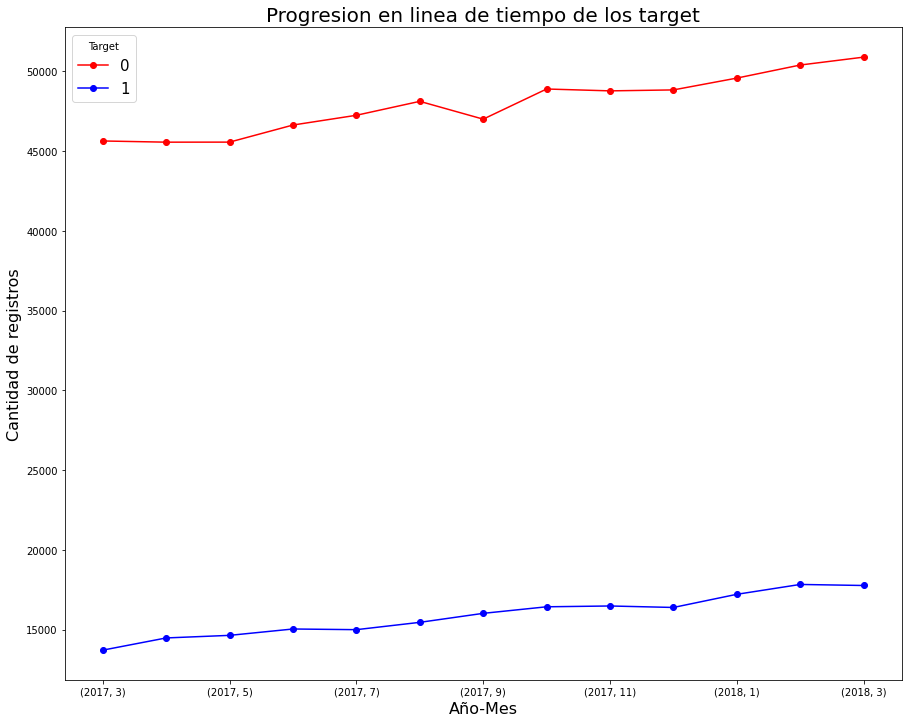

In [173]:
plot = fechas_aux.groupby(['año', 'mes','target']).agg(np.size).unstack().plot(kind='line',style=['ro-','bo-'],figsize=(15,12))

plot.legend(fontsize=15,title='Target')
plot.set_ylabel('Cantidad de registros',fontsize=16)
plot.set_xlabel('Año-Mes',fontsize=16)
plot.set_title('Progresion en linea de tiempo de los target', fontsize=20)

plt.show()

Acá se puede observar mejor la progresion de los registros dependiendo del target de cada uno y se puede observar que ambos targets tienen una tendencia de crecimiento correlacionado.